# Code to perform linear regression using gradient descent

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Generating input data

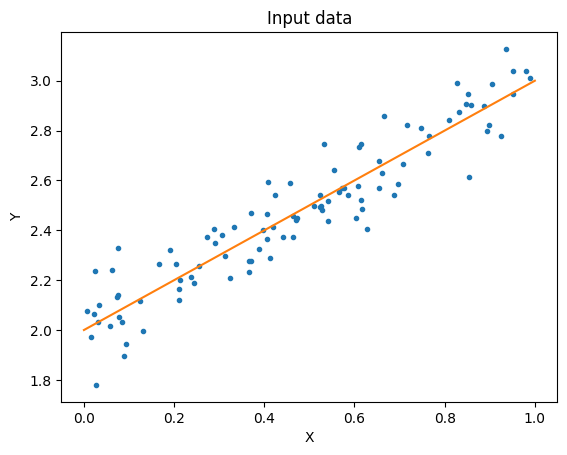

In [19]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = 0
Xmax = 1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = Slope * PointX + Intercept

PointY = PointY + NoiseVariance * np.random.randn( NumberPoints , 1  )

plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.title( 'Input data' )
plt.show()

### Perform gradient descent to find the best fit line

Let the $i$ th data point be: <br>
$\{ x_i , y_i \}$ <br>
where $i \in \{1,2,...N\}$, with $N$ data points. <br>
<br>
Our goal is to fit the line of the form $y = m x + c$ <br>
<br>
Let the initial estimate for slope and intercept be: $m_0$, $c_0$ <br>
Then the estimated $y_i$'s are <br>
$\bar{y}_i := m_0 x_i + c_0$ <br>
<br>
We define the squared error function   $E( m , c ) := \sum_{i=1}^{N} (y_i - \bar{y}_i)^2$ <br>
<br>
Now, the parameters $(m,c)$ are updated using the gradient descent algorithm as: <br>
$m \;\; \rightarrow \;\; m - \eta  \frac{\partial E}{\partial m} \;\;\; = \;\;\; m + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) x_i $ <br>
$c \;\;\; \rightarrow \;\;\; c - \eta  \frac{\partial E}{\partial c} \;\;\;\; = \;\;\;\; c + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) $ <br>
<br>
where, $\eta$ is the $Learning \; rate$.


Error =  619.4624404061051 Estimated Slope =  0.24766164675006977 Estimated Intercept 0.4942259190392788
Error =  351.6200740667042 Estimated Slope =  0.4341105460358325 Estimated Intercept 0.8663491401023957
Error =  199.7830704023581 Estimated Slope =  0.5744713697055881 Estimated Intercept 1.1465385952390224
Error =  113.70827787783544 Estimated Slope =  0.6801317911915705 Estimated Intercept 1.3575090960387157
Error =  64.91338620417736 Estimated Slope =  0.7596658209399635 Estimated Intercept 1.5163630933431678
Error =  37.252075442059805 Estimated Slope =  0.8195290046611534 Estimated Intercept 1.6359773760437948
Error =  21.571167883408773 Estimated Slope =  0.8645818524014719 Estimated Intercept 1.726047145149902
Error =  12.681824059783581 Estimated Slope =  0.8984839390648214 Estimated Intercept 1.7938721186456252
Error =  7.642545849264387 Estimated Slope =  0.9239906308068849 Estimated Intercept 1.844948406017816
Error =  4.785829129077014 Estimated Slope =  0.9431764964445

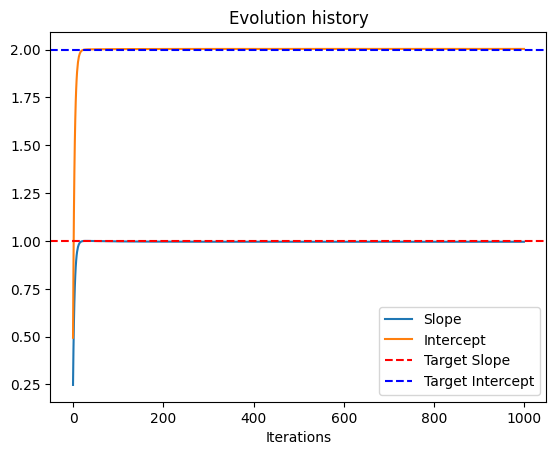

In [23]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 1000
LearningRate = 0.001

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    PointYEstimate = SlopeEstimate * PointX + InterceptEstimate

    Error = np.sum( ( PointY - PointYEstimate )**2 )
    dError_dSlope = np.sum( -2 * ( PointY - PointYEstimate ) * PointX )
    dError_dIntercept = np.sum( -2 * ( PointY - PointYEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='b' , linestyle='--' )
plt.legend( ['Slope','Intercept','Target Slope','Target Intercept'])
plt.title( 'Evolution history' )
plt.xlabel( 'Iterations' )
plt.show()

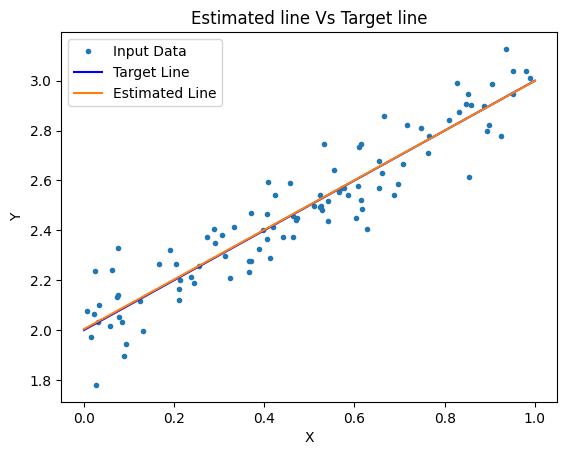

In [25]:
plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] , 'b' )
plt.plot( [Xmin,Xmax] , [SlopeEstimate*Xmin+InterceptEstimate , SlopeEstimate*Xmax+InterceptEstimate])
plt.title( 'Estimated line Vs Target line' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.legend( ['Input Data','Target Line','Estimated Line'] )
plt.show()